In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_table('..../spam.tsv',sep='\t', header=None, names=['label', 'msg'])
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


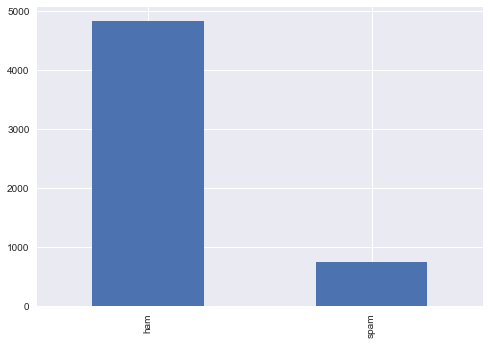

In [3]:
df.label.value_counts().plot(kind="bar")

Null accuracy rate is the percentage chance of predicting a single row correctly

In [4]:
df.groupby('label').describe().transpose()

label   ham                                      spam         \
      count unique                     top freq count unique   
msg    4825   4516  Sorry, I'll call later   30   747    653   

label                                                          
                                                     top freq  
msg    Please call our customer service representativ...    4

In [5]:
df.label.value_counts()/df.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

If we blindly guessed ham we would be correct about 87% of the time

In [6]:
df['length']=df['msg'].map(lambda text:len(text))
df.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


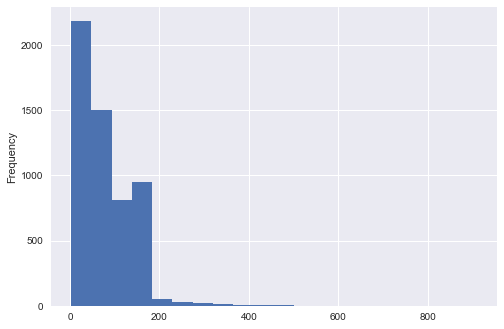

In [7]:
df.length.plot(kind='hist', bins=20)

In [8]:
df.msg = df.msg.apply(lambda x:x.lower())

In [9]:
df[df.msg.str.contains('send cash now')] .shape

(0, 3)

In [10]:
# simple count vectorizer example
from sklearn.feature_extraction.text import CountVectorizer
# start with a simple example
train_simple = ['call you tonight',
'Call me a cab',
'please call me... PLEASE 44!']

In [11]:
# learn the 'vocabulary' of the training data
vect = CountVectorizer()
train_simple_dtm = vect.fit_transform(train_simple)
pd.DataFrame(train_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,0,0,1,1
1,0,1,1,1,0,0,0
2,1,0,1,1,2,0,0


In [12]:
# transform testing data into a document-term matrix (using existing vocabulary, notice don't is missing)
test_simple = ["please don't call me"]
test_simple_dtm = vect.transform(test_simple)
test_simple_dtm.toarray()
pd.DataFrame(test_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,1,1,0,0


In [13]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.msg, df.label,
random_state=1)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# instantiate the vectorizer
vect = CountVectorizer()
# learn vocabulary and create document-term matrix in a single step
train_dtm = vect.fit_transform(X_train)
train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [15]:
# transform testing data into a document-term matrix
test_dtm = vect.transform(X_test)
test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [16]:
## MODEL BUILDING WITH NAIVE BAYES
# train a Naive Bayes model using train_dtm
from sklearn.naive_bayes import MultinomialNB
# import our model
nb = MultinomialNB()
# instantiate our model
nb.fit(train_dtm, y_train)
# fit it to our training set

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
# make predictions on test data using test_dtm
preds = nb.predict(test_dtm)
preds


array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], 
      dtype='<U4')

In [18]:
# compare predictions to true labels
from sklearn import metrics
print(metrics.accuracy_score(y_test, preds))
print(metrics.confusion_matrix(y_test, preds))

0.988513998564
[[1203    5]
 [  11  174]]


In [19]:
nb.classes_

array(['ham', 'spam'], 
      dtype='<U4')